# Trading With Momentum Channels in Python

###### https://medium.com/swlh/trading-with-momentum-channels-in-python-f58a0f3ebd37

###### https://towardsdatascience.com/algorithmic-trading-101-1f9bb503e22a

# Bollinger Bands® (BB Value)
### Description:

- A TA defined by a set of lines plotted two STDs above and below from a SMA of the stock price. 

- Bollinger Bands® were developed by John Bollinger. 
- They comprise of three lines: a simple moving average (middle band), an upper band, and a lower band. 

- The upper  and lower bands are +/- 2 STD above and below respectively from a 14-day SMA.

~~~~ 
 Upper Band = (Rolling Mean) + (2 * Standard Deviation)
 Lower Band = (Rolling Mean) - (2 * Standard Deviation)
~~~~

- BB Value = (Prices — Rolling Mean) / (2 * Standard Deviation)

- Signal: STD is a measure of volatility, and hence when markets become more volatile the bands widen, and vice versa.

### Buying position: 
-  When the stock price tends to falls below the lower band, it indicates a good buying position. 
- In this case, BB Value is less than 0.

### Selling position: 
- When the stock price tends to rise above the upper band, it indicates a good selling position. 
- In this case, BB Value is greater than 1.

# Relative Strength Index (RSI)
### Description:

- RSI is a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock. 

- RSI is a popular momentum oscillator. It compares the bullish and bearish price momentum plotted against the graph of an asset’s price. The index is calculated by the average gain and average loss over a rolling time window.

~~~~
Average Gain = Total Gain / Lookback
Average Loss = Total Loss / Lookback
RSI = 100 — (100 / (1 + (Average Gain / Average Loss)))
~~~~

# Signal:
Comparing the average gain with the average loss shows if the market is tending towards a positive or a negative momentum associated with a stock. However, the comparison needs to encompass the momentum associated with the market indicator (SPY) as well.

- Buying position: 
- When the RSI for the stock is below 30 and the RSI for SPY is greater than 30, it indicates a good buying position. This signifies that the market is oversold.
- Selling position: 
- When the RSI for the stock is above 70 and the RSI for SPY is less than 70, it indicates a good selling position. This signifies that the market is overbought.

# Momentum
#### Description:
- Momentum is an oscillator which gauges the momentum of a stock by comparing the stock price to a historical price over a specified time window. 

- Positive values of momentum signify that the price of the stock is on an upwards roll, while negative values of momentum signify that the price of the stock is on a downwards roll. 

~~~~  
Momentum is calculated using the following formula: <br>
Momentum = (Price[t] / Price[t-N]) — 1
~~~~

Signal:
Momentum indicates a simple upwards or downwards direction of price movement over a specified time window.
Buying position: When momentum > 0, it indicates that the stock price is on the rise. This can be a potential buying position.

Selling position: When the momentum < 0, it indicates that the stock price is on the fall. This can be a potential selling position.

Momentum is very sensitive to volatile price changes. Hence it should be noted that the threshold can be adjusted on a case by case basis to ensure correlation between momentum and future price.

# Volatility (Z-score)
#### Description:
- Volatility is defined as the statistical measure of the dispersion of returns for a given stock of market index. 
- It represents how large a stock’s price swings around the mean price. 
- The movement of the stock price around the mean is quantified in the unit of standard deviations. 
- Volatile assets are often considered riskier than less volatile assets as it impacts the predictability of the price. 
- Higher volatility means that the stock’s price can be spread out over a larger range of values. 
- This means that the price can dramatically change over a short period of time in either direction. 
- Lower volatility indicates the stock’s price down not fluctuate hysterically, and hence is steadier. 
- Volatility can be quantified using the following formula:
~~~~
Volatility (Z-score) = (Price — Mean) / (Standard Deviation)
~~~~

#### Signal:
- Stocks with lower volatility (combined with a positive momentum) tend to indicate safer position, as opposed to stocks with higher volatility.
- Buying position: When the volatility is less than 3, it indicates that the stock price steadier. This can be a potential buying position.
- Selling position: When the volatility is greater than 3, it indicates that the stock price is unsteady. This can be a potential selling position.
- It should be noted that volatility (z-score) ought to be combined with a momentum and trend signal to identify buying or selling position.

# Moving Average Convergence Divergence (MACD)
#### Description:

- MACD as trend-following momentum indicator that shows the relationship between two moving averages of a stock’s price. 

- MACD is calculated by subtracting 26-period exponential moving average (EMA) from the 12-period exponential moving average (EMA). 

- This is called as the MACD fast line. 

- The MACD slow line is the 9-period EMA. 

- The difference between the MACD fast line and the MACD slow line helps create a histogram which shows divergence and convergence. 

- This histogram can be used to identify a buying trend or a selling trend in the market. 

- For the purpose of our calculation, we only focus on the market trend by taking a difference between MACD fast and MACD slow lines:

~~~~
MACD fast line = EMA(12 months) — EMA(26 months)
MACD slow line = EMA(9 months)
MACD Histogram (or Indicator) = MACD fast line — MACD slow line
~~~~

#### Signal:

- The difference between the MACD fast and slow lines (or the MACD indicator) indicates a buy or selling trend in the market. MACD triggers when it crosses above (to buy) or below (to sell) its signal line.

- Buying position: When the MACD fast line crosses above the MACD slow line, the difference becomes positive. Hence, when the MACD indicator is greater than 0, it can be a potential buying position.

- Selling position: When the MACD fast line crosses below the MACD slow line, the difference becomes negative. Hence, when the MACD indicator is less than 0, it can be a potential selling position.#


                                                                        
![Indicators](https://miro.medium.com/max/1400/1*Uzdj5iY4igV1f4ukdLNzzw.png "Indicators")


> Buying Strategy: [ (BB Value < 0) AND (RSI < 30) AND (RSI_SPY > 30) ] OR [ (momentum > -0.2) AND (volatility >= -1.5) AND (MACD > 0) ]
>
>
> Selling Strategy: [ (BB Value > 0) AND (RSI > 70) AND (RSI_SPY < 70) ] OR [ (momentum < 0.1) AND (MACD < -1.0) ]

<img url = https://miro.medium.com/max/1400/1*Uzdj5iY4igV1f4ukdLNzzw.png>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_file(f):
    fixprice = lambda x: float(x.replace(',', '.'))
    df = pd.read_csv(f)
    if "Gmt time" in df.columns:
        df['Date'] = pd.to_datetime(df['Gmt time'], format="%d.%m.%Y %H:%M:%S.%f")
    elif "time" in df.columns:
        df['Date'] = pd.to_datetime(df['time'], unit="s")
        df['Date'] = df['Date'] + np.timedelta64(3 * 60, "m")
        df[['Date', 'Open', 'High', 'Low', 'Close']] = df[['Date', 'open', 'high', 'low', 'close']]
        df = df[['Date', 'Open', 'High', 'Low', 'Close']]
    elif "Tarih" in df.columns:
        df['Date'] = pd.to_datetime(df['Tarih'], format="%d.%m.%Y")
        df['Open'] = df['Açılış'].apply(fixprice)
        df['High'] = df['Yüksek'].apply(fixprice)
        df['Low'] = df['Düşük'].apply(fixprice)
        df['Close'] = df['Şimdi'].apply(fixprice)
    else:
        df["Date"] = pd.to_datetime(df["Date"])
    # we need to shift or we will have lookahead bias in code
    df["Returns"] = (df["Close"].shift(1) - df["Close"].shift(2)) / df["Close"].shift(2)
    return df

In [3]:
def plot_candles(df, l=0):
    """
        Plots candles
        l: plot last n candles. If set zero, draw all
    """
    db = df.copy()
    if l > 0:
        db = db[-l:]
    db = db.reset_index(drop=True).reset_index()
    db["Up"] = db["Close"] > db["Open"]
    db["Bottom"] = np.where(db["Up"], db["Open"], db["Close"])
    db["Bar"] = db["High"] - db["Low"]
    db["Body"] = abs(db["Close"] - db["Open"])
    db["Color"] = np.where(db["Up"], "g", "r")
    fig, ax = plt.subplots(1, 1, figsize=(16, 9))
    ax.yaxis.tick_right()
    ax.bar(db["index"], bottom=db["Low"], height=db["Bar"], width=0.25, color="#000000")
    ax.bar(db["index"], bottom=db["Bottom"], height=db["Body"], width=0.5, color=db["Color"])
    ax.plot(db["OVB"], color="r", linewidth=0.25)
    ax.plot(db["OVS"], color="r", linewidth=0.25)
    plt.show()

In [4]:
def add_momentum(df, lb=20, std=2):
    df["MA"] = df["Returns"].rolling(lb).mean()
    df["STD"] = df["Returns"].rolling(lb).std()
    df["OVB"] = df["Close"].shift(1) * (1 + (df["MA"] + df["STD"] * std))
    df["OVS"] = df["Close"].shift(1) * (1 + (df["MA"] - df["STD"] * std))
    return df

In [5]:
def stats(df):
    total = len(df)
    ins1 = df[(df["Close"] > df["OVS"]) & (df["Close"] < df["OVB"])]
    ins2 = df[(df["Close"] > df["OVS"])]
    ins3 = df[(df["Close"] < df["OVB"])]
    il1 = len(ins1)
    il2 = len(ins2)
    il3 = len(ins3)
    r1 = np.round(il1 / total * 100, 2)
    r2 = np.round(il2 / total * 100, 2)
    r3 = np.round(il3 / total * 100, 2)
    return r1, r2, r3

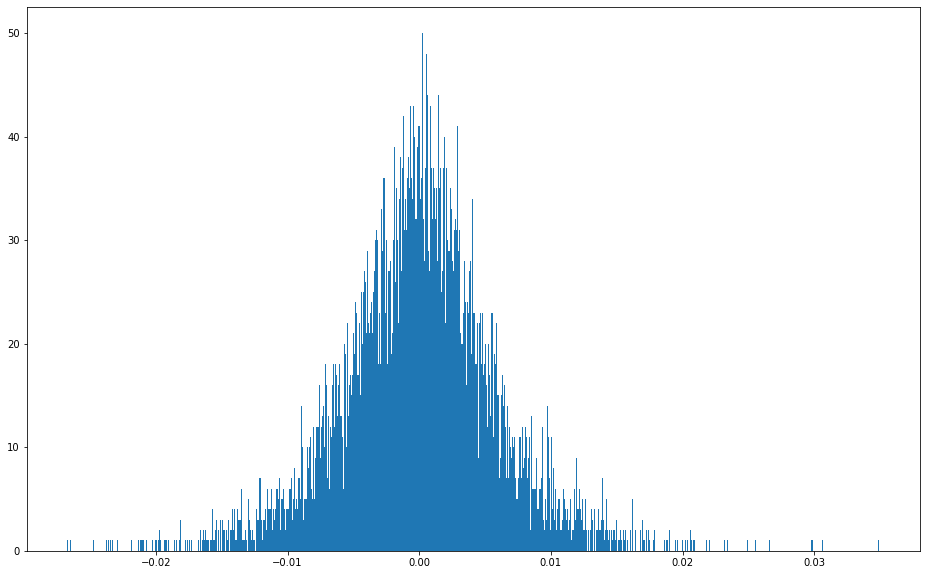

In [6]:
sym = "EURUSD"
period = "1d"
fl = "./{} {}.csv".format(period, sym)
df = load_file(fl)
df["Returns"].hist(bins=1000, grid=False, figsize=(16,10))

In [7]:
df = add_momentum(df, 20, 1)

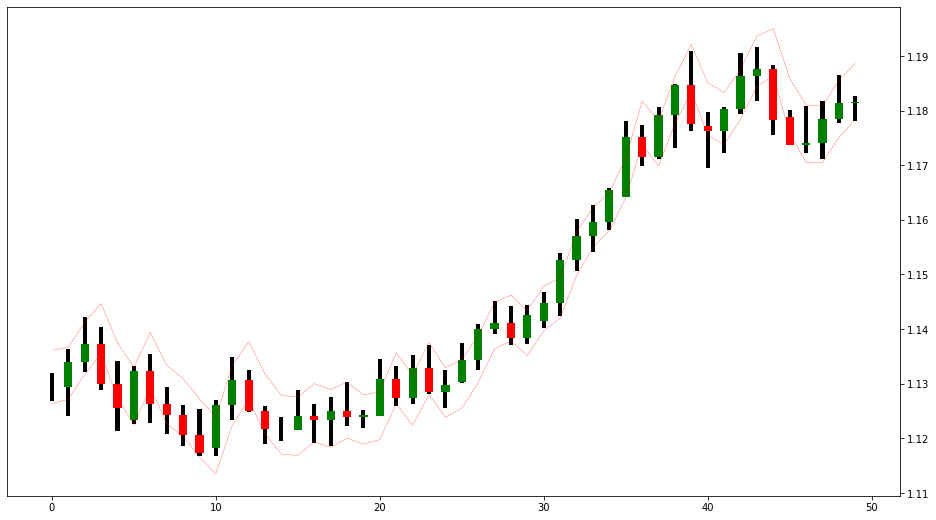

In [8]:
plot_candles(df, 50)

In [9]:
stats(df)

(67.36, 83.3, 83.77)